#**Decision Tree for Classification to evaluate Customer acceptability of Cars**

**Dataset:** This Car evaluation dataset is taken from UCI Machine learning repository derived from simple hierarchical decision model.

**Task:** The key task is to evaluate Customer acceptability of Cars. The file car_evaluation.csv contains the dataset required to solve the task.

**Input Variables:**

* Buying price (vhigh, high, med, low)
* Price of the maintenance (vhigh, high, med, low)
* Number of doors (2, 3, 4, 5more)
* Persons capacity in terms of persons to carry (2, 4, more)
* Size of luggage boot (small, med, big)
* Estimated safety of the car (low, med, high)

**Output Variable:**
* Car acceptability (unacc, acc, good, vgood)


In [ ]:
#importing the basic required libraries
import numpy as np
import pandas as pd

##**Reading data from the given data format(csv file):**

In [ ]:
from google.colab import files 
uploaded= files.upload() #uploading the files

Saving car_evaluation.csv to car_evaluation (6).csv


In [ ]:
import io
#creating dataframes from the csv file
df=pd.read_csv(io.BytesIO(uploaded['car_evaluation.csv']),header=None) 

In [ ]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


##**Cleaning and Preparing the Data:**

###**Renaming the columns/variables  with meaningful column/variable names:**

In [ ]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [ ]:
df.rename(columns={0:"Buying price"},inplace=True)
df.rename(columns={1:"Price of the maintenance"},inplace=True) 
df.rename(columns={2:"Number of doors"},inplace=True)
df.rename(columns={3:"Capacity"},inplace=True)
df.rename(columns={4:"The size of luggage boot"},inplace=True)
df.rename(columns={5:"Estimated safety of the car"},inplace=True)
df.rename(columns={6:"Customer Acceptability"},inplace=True)

In [ ]:
df.head()

,Buying price,Price of the maintenance,Number of doors,Capacity,The size of luggage boot,Estimated safety of the car,Customer Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Buying price                 1728 non-null   object
 1   Price of the maintenance     1728 non-null   object
 2   Number of doors              1728 non-null   object
 3   Capacity                     1728 non-null   object
 4   The size of luggage boot     1728 non-null   object
 5   Estimated safety of the car  1728 non-null   object
 6   Customer Acceptability       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


All the variables are found to be of object type and are categorical.

In [ ]:
df.describe()

,Buying price,Price of the maintenance,Number of doors,Capacity,The size of luggage boot,Estimated safety of the car,Customer Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,2,med,med,unacc
freq,432,432,432,576,576,576,1210


###**Checking for Missing values in the data:**

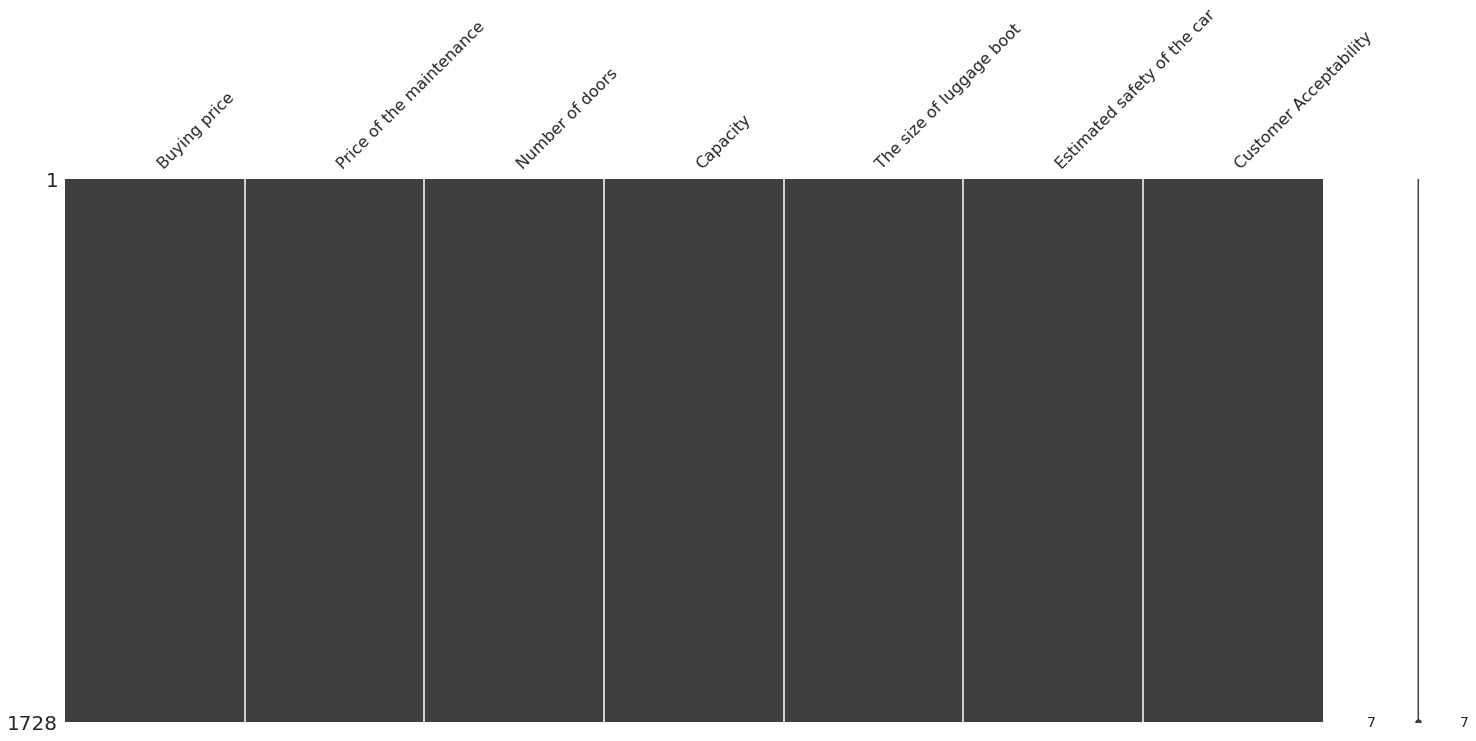

In [ ]:
import missingno as msno 
msno.matrix(df) #visualizing the missing data/NaN values in the dataframe

**Inferance:**
* There are no NaN/missing values in the data

##**Exploratory Data Analysis and Visualization:**

In [ ]:
#importing the libraries required for visualization
import os
import torch
import torchvision
from torch.utils.data import random_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Mapping the categorical 'Customer Acceptability' variable to numerical ordinal levels:**

In [ ]:
df['Customer Acceptability'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
df['Customer Acceptability'] = df['Customer Acceptability'].map({'unacc':0, 'acc':1, 'vgood':2, 'good':3})

**Exploratory Data Analysis and Visualization:**

Text(0, 0.5, 'Average Customer Acceptability level')

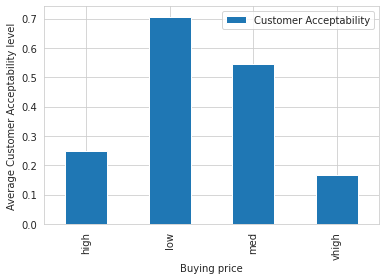

In [ ]:
x=df[['Buying price', 'Customer Acceptability']].groupby('Buying price').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Buying price')
plt.set_ylabel('Average Customer Acceptability level') 

**Inferance:**
* Lower the buying price, higher is the average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

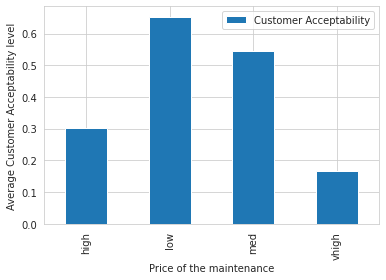

In [ ]:
x=df[['Price of the maintenance', 'Customer Acceptability']].groupby('Price of the maintenance').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Price of the maintenance')
plt.set_ylabel('Average Customer Acceptability level') 

**Inferance:**
* Lower the price of maintainance, higher is the average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

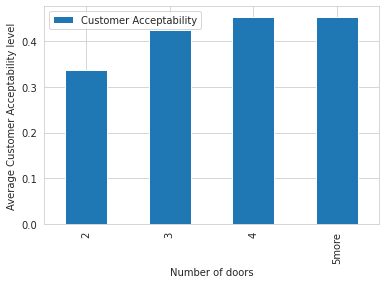

In [ ]:
x=df[['Number of doors', 'Customer Acceptability']].groupby('Number of doors').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Number of doors')
plt.set_ylabel('Average Customer Acceptability level') 

**Inferance:**
* Higher the number of doors in the car, higher is the average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

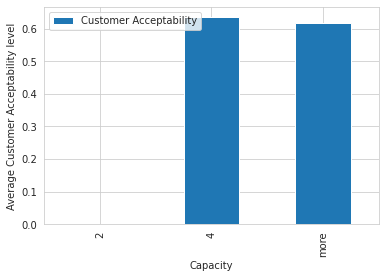

In [ ]:
x=df[['Capacity', 'Customer Acceptability']].groupby('Capacity').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Capacity')
plt.set_ylabel('Average Customer Acceptability level') 

In [ ]:
df[['Capacity', 'Customer Acceptability']].groupby('Capacity').mean()

,Customer Acceptability
Capacity,
2,0.000000
4,0.635417
more,0.616319


**Inferance:**
* Cars with a capacity of 2 have zero customer acceptability level.
* Cars with a capacity of 4 people was most preffered and had the highest average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

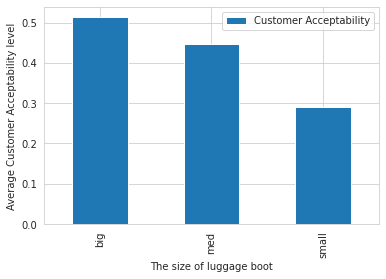

In [ ]:
x=df[['The size of luggage boot', 'Customer Acceptability']].groupby('The size of luggage boot').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('The size of luggage boot')
plt.set_ylabel('Average Customer Acceptability level')  

**Inferance:**

* Higher the size of luggage boot, higher is the average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

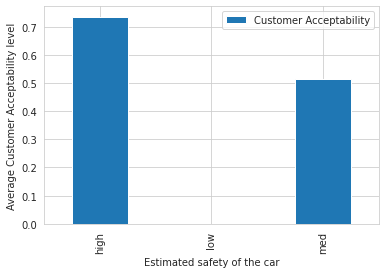

In [ ]:
x=df[['Estimated safety of the car', 'Customer Acceptability']].groupby('Estimated safety of the car').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Estimated safety of the car')
plt.set_ylabel('Average Customer Acceptability level')  

In [ ]:
df[['Estimated safety of the car', 'Customer Acceptability']].groupby('Estimated safety of the car').mean()

,Customer Acceptability
Estimated safety of the car,
high,0.736111
low,0.000000
med,0.515625


**Inferance:**
* Cars with low safety estimation, had zero customer acceptability level.
* Higher the estimated safety of the car, higher is the average customer acceptance level.

##**Preprocessing the Data for Analysis:**

##**Creating a categorical variables from the given variables of 'object' type:**

And since all the categories in the variables have a naturally increasing order, they can be converted to numbers (e.g. 1, 2, 3, 4, 5) preserving the order. These are called ordinals.

**Buying price:**

In [ ]:
df['Buying price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df['Buying price'] = df['Buying price'].map({'low':1, 'med':2, 'high':3,'vhigh':4})

**Price of the maintenance:**

In [ ]:
df['Price of the maintenance'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df['Price of the maintenance'] = df['Price of the maintenance'].map({'low':1, 'med':2, 'high':3,'vhigh':4})

**Number of doors:**

In [ ]:
df['Number of doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
df['Number of doors'] = df['Number of doors'].map({'2':1, '3':2, '4':3, '5more':4})

**Capacity:**

In [ ]:
df['Capacity'].unique()

array(['2', '4', 'more'], dtype=object)

In [ ]:
df['Capacity'] = df['Capacity'].map({'2':1, '4':2, 'more':3})

**The size of luggage boot:**

In [ ]:
df['The size of luggage boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [ ]:
df['The size of luggage boot'] = df['The size of luggage boot'].map({'small':1, 'med':2, 'big':3})

**Estimated safety of the car:**

In [ ]:
df['Estimated safety of the car'].unique()

array(['low', 'med', 'high'], dtype=object)

In [ ]:
df['Estimated safety of the car'] = df['Estimated safety of the car'].map({'low':1, 'med':2, 'high':3})

**CORRELATION MATRIX FOR THE DIFFERENT FEATURES IN THE DATA:**

In [ ]:
corr_matrix = df.corr()

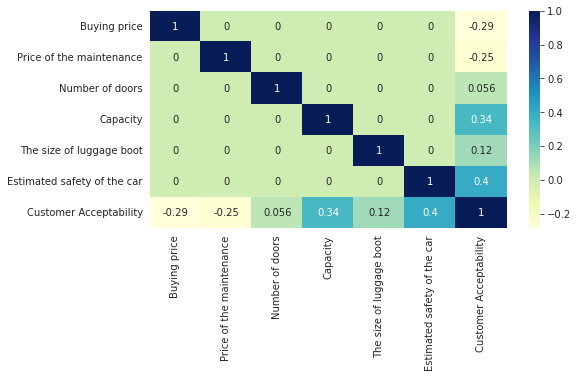

In [ ]:
#Visualizing the correlation matrix using a heatmap in seaborn
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, cmap='YlGnBu',annot=True)

##**Decision Tree for Classification to predict Customer acceptability of Cars:**

###**Making the Training, Validation and Test Sets**
While building real-world machine learning models, it is quite common to split the dataset into three parts:

**Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.

**Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. Learn more here.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (1296, 7)
val_df.shape : (432, 7)


###**Identifying Input and Target Columns**
Let's create a list of input columns, and also identify the target column.

In [ ]:
df.columns

Index(['Buying price', 'Price of the maintenance', 'Number of doors',
       'Capacity', 'The size of luggage boot', 'Estimated safety of the car',
       'Customer Acceptability'],
      dtype='object')

In [ ]:
input_cols = ['Buying price', 'Price of the maintenance', 'Number of doors',
       'Capacity', 'The size of luggage boot', 'Estimated safety of the car']

In [ ]:
target_col = 'Customer Acceptability'

In [ ]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

##**Building the Decision Tree Model:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 4.87 ms, sys: 0 ns, total: 4.87 ms
Wall time: 5.46 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model.feature_importances_

array([0.1051017 , 0.18766695, 0.05416649, 0.2564008 , 0.16625126,
       0.2304128 ])

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df

,feature,importance
3,Capacity,0.256401
5,Estimated safety of the car,0.230413
1,Price of the maintenance,0.187667
4,The size of luggage boot,0.166251
0,Buying price,0.105102
2,Number of doors,0.054166


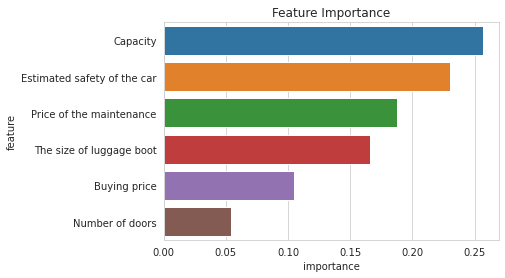

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

##**Visualization of the Model:**
We can visualize the decision tree learned from the training data.

In [ ]:
from sklearn.tree import plot_tree, export_text

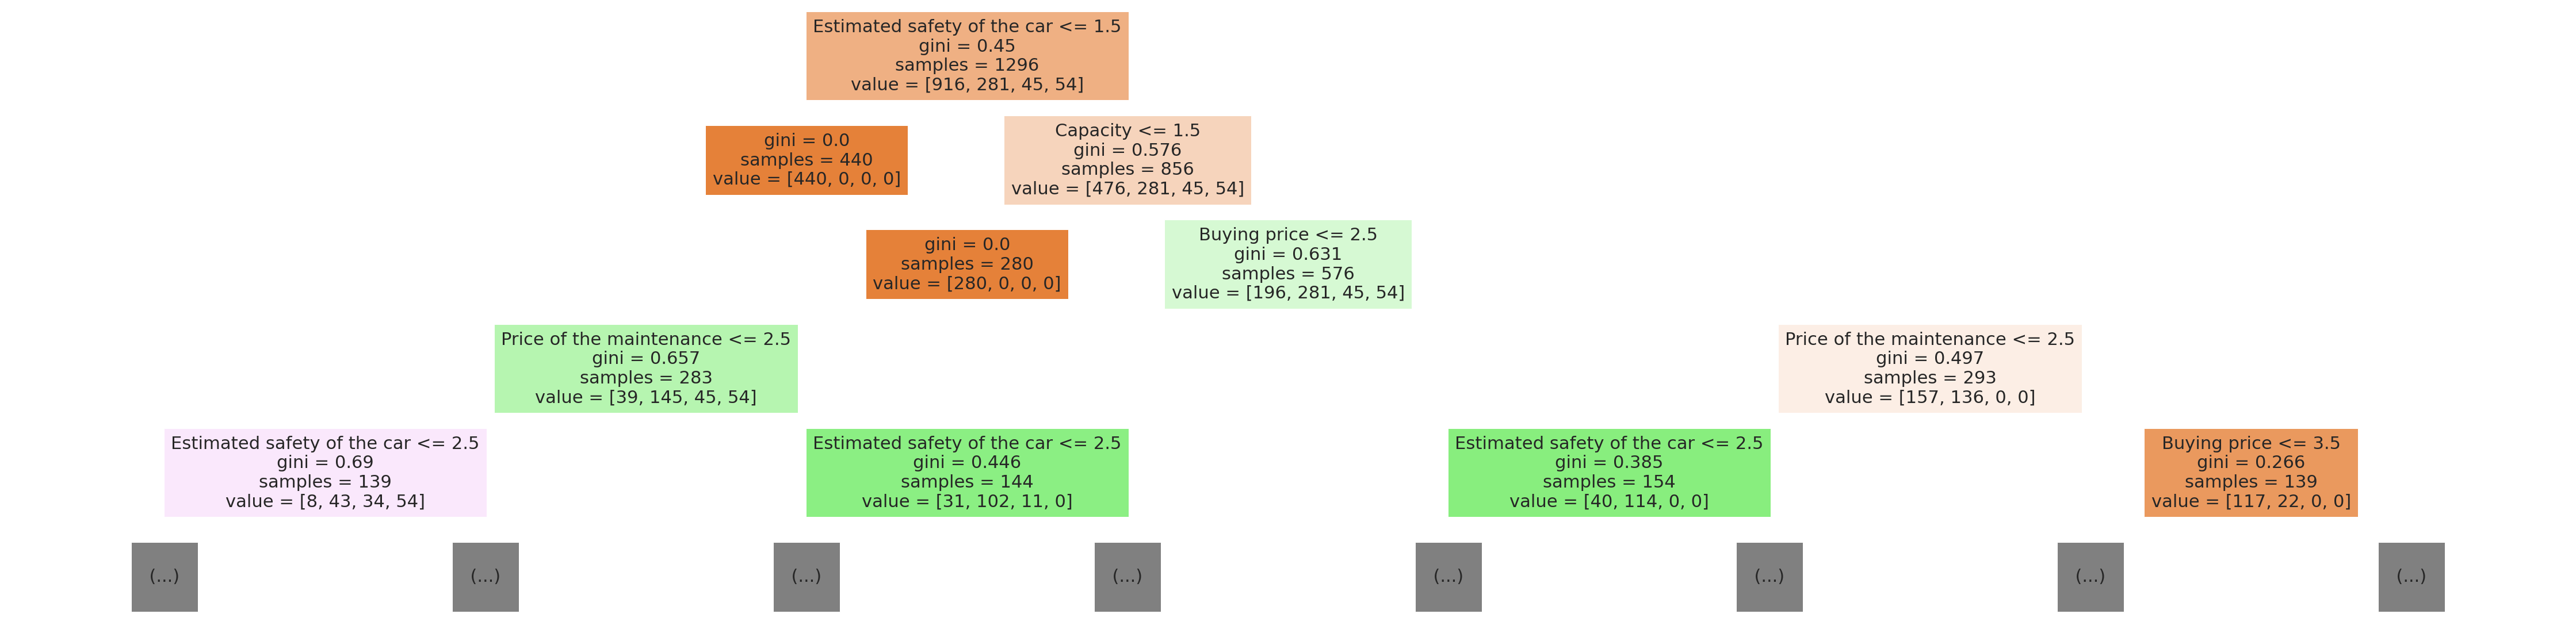

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_inputs.columns, max_depth=4, filled=True);

##**Making predictions using the Decision Tree Model**

In [ ]:
#making predictions on the train data

train_preds= model.predict(train_inputs)
train_preds

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score #for accuracy_score

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Decision Tree on the Training dataset is',round(accuracy_score(train_preds,train_targets)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Decision Tree on the Training dataset is 100.0


In [ ]:
#making predictions on the validation data

val_preds= model.predict(val_inputs)
val_preds

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 1,
       3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 2,
       0, 1, 1, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       2, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 3, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score #for accuracy_score

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Decision Tree on the Validation dataset is',round(accuracy_score(val_preds,val_targets)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Decision Tree on the Validation dataset is 97.22


Text(0.5, 1.0, 'Confusion Matrix')

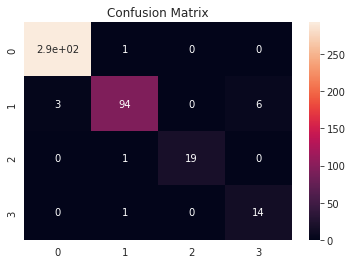

In [ ]:
from sklearn.metrics import confusion_matrix #for confusion matrix

cm = confusion_matrix(val_targets,val_preds)

#visualize the confusion matrix 
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')